In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import os

In [3]:
hdul = fits.open("../data/eROSITA_5.0x5.0/Phox/phlist_140.fits")
redshift = hdul[0].header["REDSHIFT"]
redshift

0.032637492755919

In [4]:
data = hdul[2].data
table = pd.DataFrame(data[:])
table["REDSHIFT"] = redshift
print(table.to_numpy())

[[ 0.1747205  12.34507561  8.04138279  0.03263749]
 [ 0.19680159 12.36287975  8.04604626  0.03263749]
 [ 0.17229494 12.45425797  7.61272335  0.03263749]
 ...
 [ 0.72353977  8.36527824 11.50980282  0.03263749]
 [ 1.39314687  8.35939693 11.53186512  0.03263749]
 [ 3.37372637  8.34757519 11.52863026  0.03263749]]


In [5]:
a = table.to_numpy()[0:2]
b = table.to_numpy()[2:4]
np.concatenate((a,b))

array([[ 0.1747205 , 12.34507561,  8.04138279,  0.03263749],
       [ 0.19680159, 12.36287975,  8.04604626,  0.03263749],
       [ 0.17229494, 12.45425797,  7.61272335,  0.03263749],
       [ 0.19681488, 12.48889256,  7.57853699,  0.03263749]])

In [6]:
data["ENERGY"]

array([0.1747205 , 0.19680159, 0.17229494, ..., 0.72353977, 1.3931469 ,
       3.3737264 ], dtype=float32)

In [7]:
data.field("RA").mean()

10.602292

In [8]:
data.field("DEC").mean()

10.323925

In [9]:
wd = 'eROSITA_5.0x5.0/Phox/'
mylist = sorted(os.listdir("/home/aleksei/work/clusters/data/"+wd))

mylist = [item for item in mylist if item[:6] == "phlist"]
print(wd+str(mylist))

table_merged = [np.zeros((4))]
print(table_merged)

length = 0

for item in mylist:
    if item[:6] == "phlist":
        
        hdul = fits.open("/home/aleksei/work/clusters/data/eROSITA_5.0x5.0/Phox/"+item)
        redshift = hdul[0].header["REDSHIFT"]
        
        data = hdul[2].data
        table = pd.DataFrame(data[:])
        table["REDSHIFT"] = redshift
        
        table_array = table.to_numpy()
        length = length + len(table_array)
        
        table_merged = np.concatenate((table_merged, table_array))
        
        #print(wd+item, )
        #print(table.to_numpy())
        hdul.close()
        
print(type(table_merged[1:]))
print(length)

eROSITA_5.0x5.0/Phox/['phlist_036.fits', 'phlist_040.fits', 'phlist_044.fits', 'phlist_048.fits', 'phlist_052.fits', 'phlist_056.fits', 'phlist_060.fits', 'phlist_064.fits', 'phlist_068.fits', 'phlist_072.fits', 'phlist_076.fits', 'phlist_080.fits', 'phlist_084.fits', 'phlist_088.fits', 'phlist_092.fits', 'phlist_096.fits', 'phlist_100.fits', 'phlist_104.fits', 'phlist_108.fits', 'phlist_112.fits', 'phlist_116.fits', 'phlist_120.fits', 'phlist_124.fits', 'phlist_128.fits', 'phlist_132.fits', 'phlist_136.fits', 'phlist_140.fits']
[array([0., 0., 0., 0.])]
<class 'numpy.ndarray'>
2534310


In [10]:
pd.DataFrame(table_merged, columns=["ENERGY", "RA", "DEC", "REDSHIFT"]).drop(0).to_csv('phlist_merged.csv', index=False)

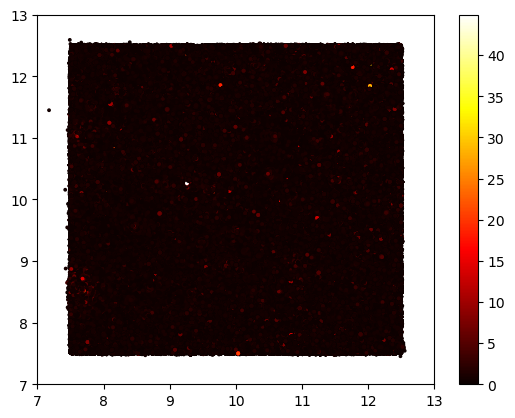

In [11]:
plt.scatter(table_merged[:, 1], table_merged[:, 2], s=3, c=table_merged[:, 0], cmap=plt.hot())
plt.xlim(7,13)
plt.ylim(7,13)
plt.colorbar()